# Exercises for Lecture 14 (Convolutional neural networks)

In [51]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# To make this notebook's output stable across runs
def reset_state(seed=42):
    tf.keras.backend.clear_session()
    tf.random.set_seed(seed)
    np.random.seed(seed)

reset_state()

## Exercise 1: Build a deeper CNN architecture for fashion MNIST than considered in the corresponding lecture to achieves a better classification accuracy.

Following the guiding CNN design principles covered in the lecture to construct a better CNN architecture.

Load and set up data.

In [52]:
# Load fashion MNIST data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-30000], X_train_full[-30000:]
y_train, y_valid = y_train_full[:-30000], y_train_full[-30000:]

# Standardize
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

# Add final channel axis (one channel)
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]



Build and fit new model, and evaluate its performance.

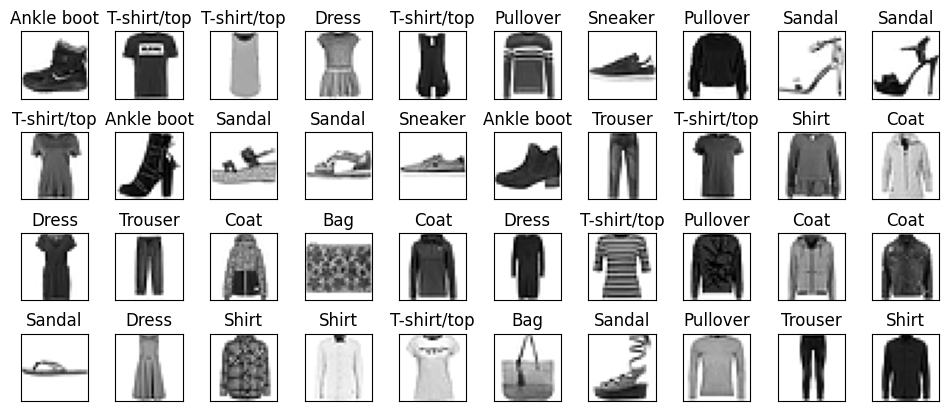

In [53]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

n_col = 10
n_row = 4

plt.figure(figsize=(n_col * 1.2, n_row * 1.2))

for row in range(n_row):
    for col in range(n_col):
        i = row * n_col + col + 1
        plt.subplot(n_row, n_col, i, xticks=[], yticks=[])
        plt.imshow(X_train_full[i-1], cmap='binary')
        plt.title(class_names[y_train_full[i-1]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()
        

In [58]:
model = keras.models.Sequential([
    
    keras.layers.Conv2D(filters=64, kernel_size=7, activation="relu", padding="same", 
                        input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    
    keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=2),
    
    keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(units=10, activation='softmax'),
])

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 256)        

In [60]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid), verbose=2)


Epoch 1/3
938/938 - 43s - loss: 0.8727 - accuracy: 0.6837 - val_loss: 0.4219 - val_accuracy: 0.8452 - 43s/epoch - 46ms/step
Epoch 2/3
938/938 - 41s - loss: 0.5117 - accuracy: 0.8261 - val_loss: 0.3761 - val_accuracy: 0.8656 - 41s/epoch - 44ms/step
Epoch 3/3
938/938 - 41s - loss: 0.4336 - accuracy: 0.8547 - val_loss: 0.3570 - val_accuracy: 0.8765 - 41s/epoch - 43ms/step


In [61]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.3671 - accuracy: 0.8703


[0.3670944273471832, 0.8702999949455261]